The data set for this project is from the UCI Machine Learning Repository.

https://archive.ics.uci.edu/ml/datasets/p53+Mutants 

# Imported the required packages

In [2]:
import pandas as pd
import numpy as np
import re
import scipy
import sklearn
from scipy import stats

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory Data Analysis

The data set consisted of 2 files – the data file, K9.data and the K9.instance.tags file that contains the names of the mutations. Both files were downloaded to the local hard drive. The .data file was read in using pd.read_csv and saved to a dataframe, ‘df’.

In [4]:
df = pd.read_csv('./K9.data', low_memory=False, header=None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31420 entries, 0 to 31419
Columns: 5410 entries, 0 to 5409
dtypes: float64(1), object(5409)
memory usage: 1.3+ GB


In [6]:
df.dtypes

0        object
1        object
2        object
3        object
4        object
         ...   
5405     object
5406     object
5407     object
5408     object
5409    float64
Length: 5410, dtype: object

In [7]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,5400,5401,5402,5403,5404,5405,5406,5407,5408,5409
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.013,0.021,0.02,0.016,-0.011,0.003,0.01,-0.007,inactive,NaN
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive,NaN
2,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,inactive,NaN
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.01,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive,NaN
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.012,0.05,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive,NaN


There are 31,420 entries and 5410 features and all the columns are of float type except for one which is an object type.

To minimize the confusion between numbered columns and rows, the prefix ‘2D’ was attached to the first 4826 column numbers and the prefix ‘3D’ to the 4827th – 5408th column using string methods to identify the 2D and 3D features. The 5409th column was labeled as ‘Type’ as it indicated the class label. 

In [8]:
# Adding the prefix '2D' and '3D' to the column names. 0-4825 - add 2D. 4826-5407 - add 3D. 
# The column with the labels active/inactive is named 'Type'
columns_string = []
for i in df.columns:
    if int(i) <= 4825:
        i = '2D'+str(i+1)
        columns_string.append(i)
    elif int(i) >= 4826 and  i <= 5407:
        i = '3D'+str(i+1)
        columns_string.append(i)
    elif int(i) == 5408:
        i = 'Type'
        columns_string.append(i)
    else:
        i = i
        columns_string.append(i)
columns_string[-10:]

['3D5401',
 '3D5402',
 '3D5403',
 '3D5404',
 '3D5405',
 '3D5406',
 '3D5407',
 '3D5408',
 'Type',
 5409]

In [9]:
df.columns = columns_string

The tags  or the mutation information of the data set is in another file 'instance.tags'. Read in this data and add it as a feature to df.

In [10]:
tags = pd.read_csv('./K9.instance.tags', header=None)

In [11]:
# Add the tags as a column to the dataframe df.
df['mutations'] = tags

In [12]:
df.head(5)

,2D1,2D2,2D3,2D4,2D5,2D6,2D7,2D8,2D9,2D10,...,3D5402,3D5403,3D5404,3D5405,3D5406,3D5407,3D5408,Type,5409,mutations
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.021,0.02,0.016,-0.011,0.003,0.01,-0.007,inactive,NaN,%a119e
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive,NaN,%a119e_l125p
2,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,inactive,NaN,%a119e_r283k_a353v
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive,NaN,%a161t
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.05,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive,NaN,%c135y


The column with NaNs was dropped. There were also some rows with ‘?’. Since, there were no descriptions of the features available and there were 5408 of them for each mutation, it seemed best to drop all missing values after converting them to NaNs. 

In [13]:
# The column 5409 is all NaN, so dropped it.
df = df.drop([5409], axis=1)

In [14]:
df.head(5)

,2D1,2D2,2D3,2D4,2D5,2D6,2D7,2D8,2D9,2D10,...,3D5401,3D5402,3D5403,3D5404,3D5405,3D5406,3D5407,3D5408,Type,mutations
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.013,0.021,0.02,0.016,-0.011,0.003,0.01,-0.007,inactive,%a119e
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive,%a119e_l125p
2,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,inactive,%a119e_r283k_a353v
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.01,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive,%a161t
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.012,0.05,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive,%c135y


In [15]:
# The dataframe has ? and NaN for some values and for full rows. Converted all ? to NaN and dropped it.
df.replace('?', np.nan, inplace = True)

In [16]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [17]:
df.isnull().sum().sum()

0

In [18]:
df.head()

,2D1,2D2,2D3,2D4,2D5,2D6,2D7,2D8,2D9,2D10,...,3D5401,3D5402,3D5403,3D5404,3D5405,3D5406,3D5407,3D5408,Type,mutations
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.013,0.021,0.02,0.016,-0.011,0.003,0.01,-0.007,inactive,%a119e
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive,%a119e_l125p
2,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.01,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive,%a161t
3,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.012,0.05,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive,%c135y
4,-0.154,0.005,-0.011,-0.013,-0.002,-0.115,0.005,0.002,-0.003,0.002,...,0.012,0.009,0.003,-0.001,0.002,-0.006,0.009,0.013,inactive,%c135y_e285m


In [19]:
sum(df['Type']=='inactive')

31008

In [20]:
sum(df['Type']=='active')

151

In [21]:
df.shape

(31159, 5410)

The ‘mutations’ column contains the mutation information for each entry/row.

For eg:  ‘%a119e_l125p’ denotes 2 point mutations separated by ‘_’, the first one is ‘a119e’ and the second one is ‘l125p’. The ‘a119e’ is read as – amino acid ‘a’ at position 119 of the protein chain is replaced by amino acid ‘e’. Based on the number of ‘_’, the ‘count’ of the mutations was determined and added as a column to the dataframe, df.

In [22]:
def mutation_counter(col):
    ### This function counts the number of mutations in each entry of the dataframe column 'mutations' ###
    ### and returns the length of each type of mutation in 4 different lists ('one','two','three','four','more') ###
    ### and a fifth list, 'count' which contains the designation for each entry as a 1,2,3,4 or >4. ###
    
    count = []                                                       # list for designating the type of mutation
    
    for i in col:                                                       # Iterating through the different entries in the column
        c = i.count('_')                                                # c is the number of '_' in the entry
        if c == 0:                                                      # if c is 0, its a one point mutation
            count.append(1)                                           # designated as a 1 in the count list
        else:                                                    # if c is 1, its a two point mutation
            count.append(c+1)                                           # designated as a 2 in the count list
        
            
    return(count)                            # return the length of each list

In [23]:
# Count the number of each mutation in the dataframe df
count = mutation_counter(df['mutations'])

In [24]:
# Using the function mutation_counter on the 'mutations' column, generated the list 'count' and added it as another 
# column 'count' to the dataframe

df['count'] = count

In [25]:
df.head()

,2D1,2D2,2D3,2D4,2D5,2D6,2D7,2D8,2D9,2D10,...,3D5402,3D5403,3D5404,3D5405,3D5406,3D5407,3D5408,Type,mutations,count
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.021,0.02,0.016,-0.011,0.003,0.01,-0.007,inactive,%a119e,1
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive,%a119e_l125p,2
2,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive,%a161t,1
3,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.05,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive,%c135y,1
4,-0.154,0.005,-0.011,-0.013,-0.002,-0.115,0.005,0.002,-0.003,0.002,...,0.009,0.003,-0.001,0.002,-0.006,0.009,0.013,inactive,%c135y_e285m,2


In [26]:
max_count = df['count'].max()
print(max_count)

6


The dataset has 1-6 point mutations. 

In human mammary carcinoma, the mutation sites of p53 tend to occur within one single exon (coding region) or a short distance from another, implying that the distance of mutations may be of importance for affecting the function of p53. Reference: Tao Huang, Shen Niu, Zhongping Xu, Yun Huang, Xiangyin Kong, Yu-Dong Cai and Kuo-Chen (2011) ChouPredicting transcriptional activity of multiple site p53 mutants based on hybrid properties. PLoS One 6(8): e22940. 

Here we used 1,2,3,4 and 5 distance features for 1 pt., 2 pt., 3pt., 4pt., 5pt. and 6pt. mutations. The distance features represent the distance between adjacent mutations, ie., the distance between the first and second mutations (difference in position numbers), second and third, and so on. 

For e.g., in a 3pt. mutation, there will be 2 distance features – one, the distance between the first and second mutation positions and the second, the distance between the second and third mutation positions. Five such distance features named ‘distance1’,…,’distance5’ were added to the data set.

In [27]:
# Adding the distance feature of the mutations - the position of the 2 point where the mutation occurred is taken and 
# the absolute value of their difference is the distance
# For the one point mutation, the dist1 is 0
# for the 2 pt mutation, the dist1 is the distance
# for the 3 pt mutation, dist1 will have 1st diff and dist2 will have the 2nd diff
# for the 4 pt mutation, dist1, dist2 and dist3
# for the 5 pt mutation, dist1, dist2 and dist3, dist4
# for the 6 pt mutation, dist1, dist2 and dist3, dist4, dist5

dist1 = []                                                            # empty lists 'dist1' to 'dist5'
dist2 = []
dist3 = []
dist4 = []
dist5 = []

for i in df['mutations']:                                            # iterating through each entry in 'mutations' column
    c = i.count('_')                                                 # c is the count of '_'
    if c == 0:                                                       # if its 0, then 1 pt mutation
        dist1.append(0)                                              # and all dist lists are appended as 0 for that entry
        dist2.append(0)
        dist3.append(0)
        dist4.append(0)
        dist5.append(0)
    elif c == 1:                                                     # If c is 1, then it is a 2 pt mutation
        a, b = i.strip('%').split('_')                               # strip off '%' and split at '_' and get 2 strings - a & b
        match_a = re.match(r"([a-z]+)([0-9]+)([a-z]+)", a, re.I)     # re for a and b - alphabet/number/alphabet
        match_b = re.match(r"([a-z]+)([0-9]+)([a-z]+)", b, re.I)    
        if match_a:
            items_a = match_a.groups()                               # group the 3 diff components into resp items_a, items_b
            pos1 = int(items_a[1])                                   # the 2nd component of each items is the 
        if match_b:                                                  # position of the aminoacid
            items_b = match_b.groups()                              
            pos2 = int(items_b[1])                                   
        dist1.append(abs(pos1 - pos2))                               # absolute difference of the positions is the distance in dist1
        dist2.append(0)                                              # the rest are appended with '0'
        dist3.append(0)
        dist4.append(0)
        dist5.append(0)
    elif c == 2:                                                     # If c is 2, then it is a 3 pt mutation
        a, b, c = i.strip('%').split('_')                            # strip off '%' and split at '_' and get 3 strings - a,b,c
        match_a = re.match(r"([a-z]+)([0-9]+)([a-z]+)", a, re.I)     # re for a,b,c - alphabet/number/alphabet
        match_b = re.match(r"([a-z]+)([0-9]+)([a-z]+)", b, re.I)     
        match_c = re.match(r"([a-z]+)([0-9]+)([a-z]+)", c, re.I)
        if match_a:
            items_a = match_a.groups()                               # group the 3 diff components into items_a, items_b, items_c
            pos1 = int(items_a[1])                                   # the 2nd component of all items is the position of the aminoacid
        if match_b:    
            items_b = match_b.groups()                               
            pos2 = int(items_b[1])                                   
        if match_c:    
            items_c = match_c.groups()                               
            pos3 = int(items_c[1])
        dist1.append(abs(pos1 - pos2))                               # dist 1 has 1st diff and dist2 has 2nd diff
        dist2.append(abs(pos2 - pos3))
        dist3.append(0)                                              # the rest are appended with '0'
        dist4.append(0)
        dist5.append(0)
    elif c == 3:                                                     # If c is 3, then it is a 4 point mutation
        a, b, c, d = i.strip('%').split('_')                         # strip off '%', split at '_' , get 4 strings - a,b,c,d
        match_a = re.match(r"([a-z]+)([0-9]+)([a-z]+)", a, re.I)     # re for a,b,c,d - alphabet/number/alphabet
        match_b = re.match(r"([a-z]+)([0-9]+)([a-z]+)", b, re.I)     
        match_c = re.match(r"([a-z]+)([0-9]+)([a-z]+)", c, re.I)
        match_d = re.match(r"([a-z]+)([0-9]+)([a-z]+)", d, re.I)     
        if match_a:
            items_a = match_a.groups()                               # group the 3 diff components into items_a,items_b,items_c,items_d
            pos1 = int(items_a[1])                                   
        if match_b:    
            items_b = match_b.groups()                               
            pos2 = int(items_b[1])                                   
        if match_c:    
            items_c = match_c.groups()                               
            pos3 = int(items_c[1])
        if match_d:    
            items_d = match_d.groups()                               
            pos4 = int(items_d[1])
        dist1.append(abs(pos1 - pos2))                               # dist1 is 1st diff, dist2 is 2nd diff and dist3 is 3rd diff 
        dist2.append(abs(pos2 - pos3))
        dist3.append(abs(pos3 - pos4))
        dist4.append(0)                                              # the rest are appended with '0'
        dist5.append(0)
    elif c == 4:                                                     # If c is 4, then it is a 5 pt mutation
        a, b, c, d, e = i.strip('%').split('_')                      # strip off '%', split at '_', get 5 strings - a,b,c,d,e
        match_a = re.match(r"([a-z]+)([0-9]+)([a-z]+)", a, re.I)     # re for a,b,c,d,e - alphabet/number/alphabet
        match_b = re.match(r"([a-z]+)([0-9]+)([a-z]+)", b, re.I)     
        match_c = re.match(r"([a-z]+)([0-9]+)([a-z]+)", c, re.I)
        match_d = re.match(r"([a-z]+)([0-9]+)([a-z]+)", d, re.I)     
        match_e = re.match(r"([a-z]+)([0-9]+)([a-z]+)", e, re.I)
        if match_a:
            items_a = match_a.groups()                               # group the 3 diff components into items_a,items_b,items_c,items_d
            pos1 = int(items_a[1])                                   # and items_e
        if match_b:                                                  # the 2nd component of items_b is the position of the aminoacid
            items_b = match_b.groups()                               
            pos2 = int(items_b[1])                                   
        if match_c:    
            items_c = match_c.groups()                               
            pos3 = int(items_c[1])
        if match_d:    
            items_d = match_d.groups()                               
            pos4 = int(items_d[1])
        if match_e:    
            items_e = match_e.groups()                               
            pos5 = int(items_e[1])
        dist1.append(abs(pos1 - pos2))                               # dist1-1st, dist2-2nd, dist3-3rd, dist4-4th
        dist2.append(abs(pos2 - pos3))
        dist3.append(abs(pos3 - pos4))
        dist4.append(abs(pos4 - pos5))
        dist5.append(0)                                              # the rest are appended with '0'
    elif c == 5:                                                     # If c is 5, then it is a 6 pt mutation
        a, b, c, d, e, f = i.strip('%').split('_')                   # strip off '%', split at '_', get 6 strings - a,b,c,d,e,f
        match_a = re.match(r"([a-z]+)([0-9]+)([a-z]+)", a, re.I)     # re for a,b,c,d,e,f - alphabet/number/alphabet
        match_b = re.match(r"([a-z]+)([0-9]+)([a-z]+)", b, re.I)     
        match_c = re.match(r"([a-z]+)([0-9]+)([a-z]+)", c, re.I)
        match_d = re.match(r"([a-z]+)([0-9]+)([a-z]+)", d, re.I)     
        match_e = re.match(r"([a-z]+)([0-9]+)([a-z]+)", e, re.I)
        match_f = re.match(r"([a-z]+)([0-9]+)([a-z]+)", f, re.I)
        if match_a:
            items_a = match_a.groups()                               # group the 3 diff components into items_a, items_b, items_c, items_d
            pos1 = int(items_a[1])                                   # items_e, items_f
        if match_b:                                                  # the 2nd component of items_b is the position of the aminoacid
            items_b = match_b.groups()                               
            pos2 = int(items_b[1])                                   
        if match_c:    
            items_c = match_c.groups()                               
            pos3 = int(items_c[1])
        if match_d:    
            items_d = match_d.groups()                               
            pos4 = int(items_d[1])
        if match_e:    
            items_e = match_e.groups()                               
            pos5 = int(items_e[1])
        if match_f:    
            items_f = match_f.groups()                               
            pos6 = int(items_f[1])
        dist1.append(abs(pos1 - pos2))                                # dist1-1st, dist2-2nd, dist3-3rd, dist4-4th, dist5-5th 
        dist2.append(abs(pos2 - pos3))
        dist3.append(abs(pos3 - pos4))
        dist4.append(abs(pos4 - pos5))
        dist5.append(abs(pos5 - pos6))                  # the rest are appended with '0'
        

In [28]:
# Added the distance lists as columns 
df['distance1'] = dist1
df['distance2'] = dist2
df['distance3'] = dist3
df['distance4'] = dist4
df['distance5'] = dist5

In [29]:
df.head()

,2D1,2D2,2D3,2D4,2D5,2D6,2D7,2D8,2D9,2D10,...,3D5407,3D5408,Type,mutations,count,distance1,distance2,distance3,distance4,distance5
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.01,-0.007,inactive,%a119e,1,0,0,0,0,0
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,0.013,0.005,inactive,%a119e_l125p,2,6,0,0,0,0
2,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.016,-0.018,inactive,%a161t,1,0,0,0,0,0
3,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.027,-0.049,inactive,%c135y,1,0,0,0,0,0
4,-0.154,0.005,-0.011,-0.013,-0.002,-0.115,0.005,0.002,-0.003,0.002,...,0.009,0.013,inactive,%c135y_e285m,2,150,0,0,0,0


There were 31269 ‘inactive’ entries and only 151 ‘active’ entries in the dataset initially. But, after removing the missing values and NaNs, adding the ‘count’ and distance features, the data frame has 31159 entries with 5416 columns. The number of ‘inactive’ entries is now 31008 and 151 ‘active’ entries.

In [30]:
df.shape

(31159, 5416)

In [31]:
# Number of 'active' and 'inactive' records

sum(df['Type'] == 'active')

151

In [32]:
sum(df['Type'] == 'inactive')

31008

In [33]:
# converting everything in the dataframe to numeric
df = df.apply(pd.to_numeric, errors='ignore')

In [35]:
df_cols = df.columns

# Data Story

The 2D features were also known as Surface Property Maps and are just numbers representing the difference between the surface map of 'normal' amino acid (wild-type) and the mutated one. The 3D features, also known as Structure Distance Maps, are also representing difference in magnitude of the distance changes in the 3D structure. This kind of multidimensional data is very hard to visualise for any specific feature correlation. We can try feature selection and dimensionality reduction on the data set and then try to visualise the key components.

For now, the spread of the different types of mutations and their respective distance features can be visualised.

It is important to know how many entries are there for each type of mutation or 'count'. This will tell us which distance feature is also more prevalent. We also need to know the range of the distance features(1-5) - this shows how close together or distant the mutations are.

The data set is skewed with 31008 'inactive' and 151 'active' entries. 

The histogram of the 'count' shows the spread of the different types of mutations in the data set. 

Text(0.5, 1.0, 'Frequency Distribution of different point mutations')

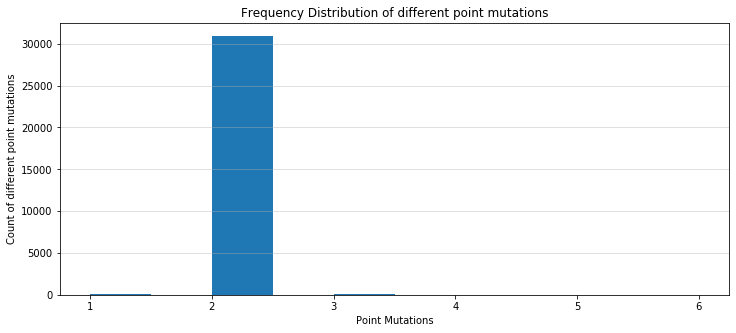

In [34]:
plt.figure(figsize=(12,5))
plt.hist(count)
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Point Mutations')
plt.ylabel('Count of different point mutations')
plt.title('Frequency Distribution of different point mutations')

The 2 pt. mutations outnumber the other types and the graph does not show the distribution of the other types. Limiting, the y-axis to a lower value will help see the distribution of the other mutations as well.

Text(0.5, 1.0, 'Frequency Distribution of different point mutations')

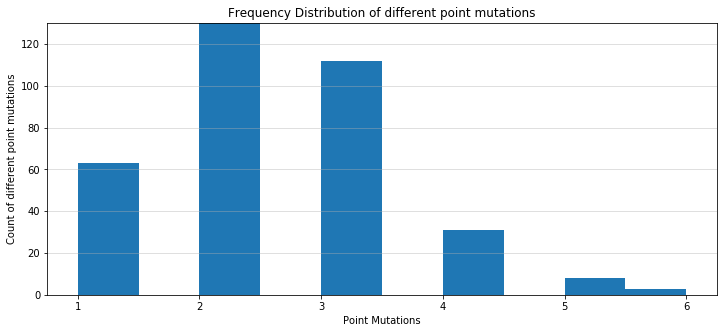

In [35]:
plt.figure(figsize=(12,5))
plt.hist(count)
plt.grid(axis='y', alpha=0.5)
plt.ylim([0,130])
plt.xlabel('Point Mutations')
plt.ylabel('Count of different point mutations')
plt.title('Frequency Distribution of different point mutations')

This shows that the majority of the entries are 2 pt. mutations, with very few of the other types.

The distance features were plotted to see what was the range of the differences between adjacent mutations.

Text(0.5, 1.0, 'Frequency Distribution of distance feature 1')

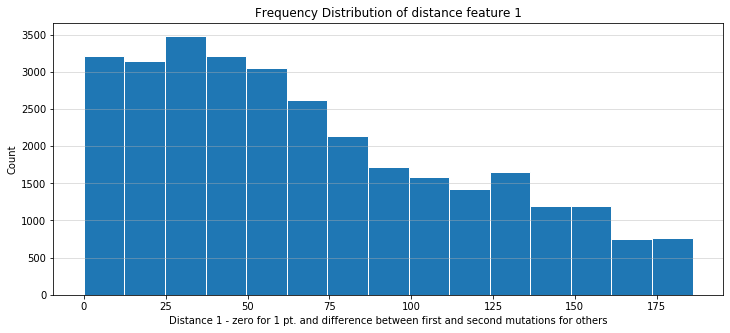

In [36]:
plt.figure(figsize=(12,5))
plt.hist(df.distance1, bins=15,edgecolor='white')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Distance 1 - zero for 1 pt. and difference between first and second mutations for others')
plt.ylabel('Count')
plt.title('Frequency Distribution of distance feature 1')

In [37]:
df.distance1.max()

186

The 'distance1' feature which contains the difference in position between the first and second mutations shows that at least half of them lie between 0-75. 

Text(0.5, 1.0, 'Frequency Distribution of distance feature 2')

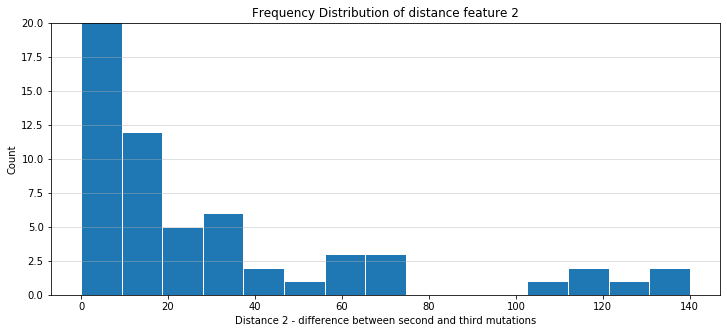

In [38]:
plt.figure(figsize=(12,5))
plt.hist(df.distance2, bins=15,edgecolor='white')
plt.grid(axis='y', alpha=0.5)
plt.ylim([0,20])
plt.xlabel('Distance 2 - difference between second and third mutations')
plt.ylabel('Count')
plt.title('Frequency Distribution of distance feature 2')

In [39]:
df.distance2.max()

140

The 'distance2' feature shows an even narrower range - most values are between 0-10 ie., the adjacent mutations are really close most of the time. Below, the 'distance3', 'distance4' and 'distance5' were also seen to give a similar result. Most adjacent mutations are located within a distance of 0-20.

Text(0.5, 1.0, 'Frequency Distribution of distance feature 3')

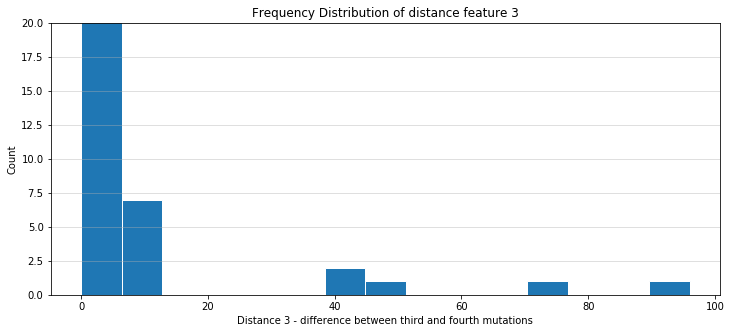

In [40]:
plt.figure(figsize=(12,5))
plt.hist(df.distance3, bins=15,edgecolor='white')
plt.grid(axis='y', alpha=0.5)
plt.ylim([0,20])
plt.xlabel('Distance 3 - difference between third and fourth mutations')
plt.ylabel('Count')
plt.title('Frequency Distribution of distance feature 3')

In [41]:
df.distance3.max()

96

Text(0.5, 1.0, 'Frequency Distribution of distance feature 4')

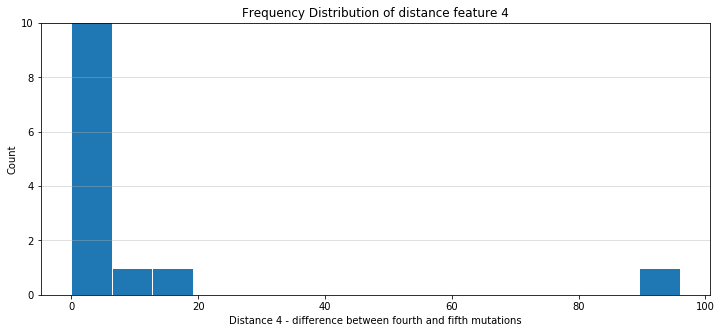

In [42]:
plt.figure(figsize=(12,5))
plt.hist(df.distance4, bins=15,edgecolor='white')
plt.grid(axis='y', alpha=0.5)
plt.ylim([0,10])
plt.xlabel('Distance 4 - difference between fourth and fifth mutations')
plt.ylabel('Count')
plt.title('Frequency Distribution of distance feature 4')

In [43]:
df.distance4.max()

96

Text(0.5, 1.0, 'Frequency Distribution of distance feature 5')

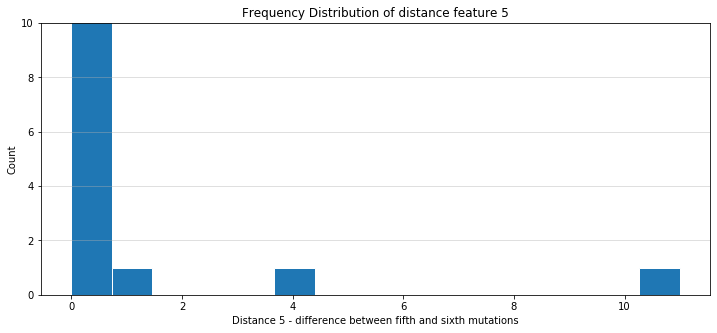

In [44]:
plt.figure(figsize=(12,5))
plt.hist(df.distance5, bins=15,edgecolor='white')
plt.grid(axis='y', alpha=0.5)
plt.ylim([0,10])
plt.xlabel('Distance 5 - difference between fifth and sixth mutations')
plt.ylabel('Count')
plt.title('Frequency Distribution of distance feature 5')

In [45]:
df.distance5.max()

11

# Statistical Analysis

The categorical 'Type' variable is converted to a numerical one to generate the number of active and inactive entries in each type of mutation.

In [34]:
# Preprocessing data
# Encoding the labels or the 'Type' category using label encoder - 1 being 'inactive' and 0 for 'active'
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Type'])
list(le.classes_)

['active', 'inactive']

In [35]:
df['Type'] = le.transform(df['Type'])

In [36]:
# checking the transform
list(le.inverse_transform([0, 1]))

['active', 'inactive']

In [37]:
y = df['Type']
y = np.array(y)

In [50]:
# Number of 'inactive' entries grouped by the different 'count' - 'inactive' is now encoded as 1 - Sum gives total
# of inactive
gr_ct_in = df.groupby('count').Type.sum()
gr_ct_in

count
1       55
2    30877
3       49
4       24
5        2
6        1
Name: Type, dtype: int64

In [51]:
# Total Number of entries grouped by the different 'count'
gr_ct_tot = df.groupby('count').Type.count()
gr_ct_tot

count
1       63
2    30942
3      112
4       31
5        8
6        3
Name: Type, dtype: int64

In [52]:
# the difference between the total entries and the 'inactive' gives the count of 'active' entries
gr_ct_ac = (gr_ct_tot) - (gr_ct_in)

In [53]:
# All the information is put into a dictionary to create a DF.
data = {'Mutations': [1,2,3,4,5,6], 'Inactive': [i for i in gr_ct_in], 'Active': [i for i in gr_ct_ac], 'Total': [i for i in gr_ct_tot]}

The following gives a clear account of the total number of entries for each type of mutation and the number of 'inactive' and 'active' records in them.

In [54]:
gr_ct_data = pd.DataFrame(data)
print(gr_ct_data)

   Mutations  Inactive  Active  Total
0          1        55       8     63
1          2     30877      65  30942
2          3        49      63    112
3          4        24       7     31
4          5         2       6      8
5          6         1       2      3


### Feature Selection

Since there are 5416 features and most of them are already not descriptive, we can reduce the dimensionality by many methods. We will use the filter method for feature selection and then use the principal component analysis (PCA). Apart from dimensionality reduction, PCA also helps in data visualization.

#### Filter Method - Correlation matrix

Feature selection plays a crucial role in classifier design. The most predictive features need to be highly correlated to the target class and least relevant to other features - this can be achieved by generating the correlation matrix and selecting for only those features that are not correlated. We drop features which have a score of more than 0.7 and also try for a score more than 0.9.

There are 4826 '2D' features and 582 '3D' features in the dataset. 

In [38]:
# Select only the numerical inputs from the predictors as df_num, save the column names into num_cols
df_num = df.drop(['Type', 'mutations'], axis=1)
num_cols = df_num.columns
print(df_num.shape)

(31159, 5414)


In [56]:
# correlation matrix of the 2D and 3D features
corrmat = df_num.corr()
corrmat

,2D1,2D2,2D3,2D4,2D5,2D6,2D7,2D8,2D9,2D10,...,3D5405,3D5406,3D5407,3D5408,count,distance1,distance2,distance3,distance4,distance5
2D1,1.000000,0.512035,0.548061,0.331467,0.271928,0.076716,0.036505,0.196495,0.264061,0.251002,...,0.098981,0.079713,-0.132522,-0.000932,-0.066117,0.046879,-0.016423,-0.011724,-0.002059,-0.084150
2D2,0.512035,1.000000,0.828004,0.344972,0.217674,0.199028,0.389890,0.592283,0.699629,0.740739,...,0.006562,-0.021223,-0.028269,0.050079,-0.017587,0.043050,-0.002825,-0.003348,-0.000594,-0.035152
2D3,0.548061,0.828004,1.000000,0.521110,0.470481,0.174281,0.199740,0.484930,0.573419,0.587853,...,0.027766,0.033655,-0.040317,-0.021829,-0.033677,0.037653,-0.003423,-0.008955,0.000262,-0.067219
2D4,0.331467,0.344972,0.521110,1.000000,0.728535,0.131094,0.052930,0.218118,0.262907,0.273347,...,0.014211,-0.030978,-0.040897,0.074768,-0.034588,0.042293,-0.003920,-0.000139,0.009783,-0.070756
2D5,0.271928,0.217674,0.470481,0.728535,1.000000,0.037602,-0.033725,0.157559,0.192000,0.203865,...,-0.009606,-0.110549,-0.034535,0.193429,-0.039565,0.060968,-0.003891,0.004071,0.014571,-0.090878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
distance1,0.046879,0.043050,0.037653,0.042293,0.060968,-0.005950,0.063932,0.022228,0.028076,0.030230,...,-0.026776,0.007083,-0.027604,0.067813,-0.003845,1.000000,-0.014778,0.000174,0.011949,-0.002520
distance2,-0.016423,-0.002825,-0.003423,-0.003920,-0.003891,-0.004118,-0.003688,-0.000598,-0.001701,-0.002465,...,-0.014568,-0.012843,0.016597,0.002503,0.360478,-0.014778,1.000000,0.146967,0.021401,0.023801
distance3,-0.011724,-0.003348,-0.008955,-0.000139,0.004071,-0.002512,-0.002055,-0.001483,-0.001613,-0.001231,...,-0.007224,-0.008572,0.008806,0.004212,0.346826,0.000174,0.146967,1.000000,0.331907,0.028511
distance4,-0.002059,-0.000594,0.000262,0.009783,0.014571,-0.001202,-0.000923,-0.000822,-0.000537,-0.000733,...,-0.003765,-0.000957,0.004277,-0.002294,0.204916,0.011949,0.021401,0.331907,1.000000,0.019067


In [57]:
# Dropped the features with correlation higher than 0.9

cols = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.9:
            if cols[j]:
                cols[j] = False
selected_columns = df_num.columns[cols]

# The selected features were used to create another dataframe df_num_selected
df_num_selected = df_num[selected_columns]
sel_numcols = df_num_selected.columns

In [58]:
df_num_selected.shape

(31159, 3789)

In [59]:
# Dropped the features with correlation higher than 0.7

cols7 = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.7:
            if cols7[j]:
                cols7[j] = False
selected_columns7 = df_num.columns[cols7]

# The selected features were used to create another dataframe df_num_selected7
df_num_selected7 = df_num[selected_columns7]
sel_numcols7 = df_num_selected7.columns

In [60]:
df_num_selected7.shape

(31159, 1670)

When the cut off score was 0.9, we dropped only 1625 features but when the cut off was lowered to 0.7, 3744 features were dropped. Both the dataframes selected for different cut off scores were used for PCA.

### Feature Scaling

Feature scaling is done to before applying PCA.

In [39]:
from sklearn.preprocessing import minmax_scale

In [40]:
# This is for the entire data before correlation matrix
X_scaled = minmax_scale(df_num)

In [63]:
# This is for the data selected for a score less than 0.9
X9_scaled = minmax_scale(df_num_selected)

In [64]:
# This is for the data selected for a score less than 0.7
X7_scaled = minmax_scale(df_num_selected7)

### PCA 

### PCA - using data selected by removing correlated features with a score more than 0.7

In [65]:
df_pca7 = pd.DataFrame(X7_scaled,columns=sel_numcols7)

In [66]:
from sklearn.decomposition import PCA
pca7 = PCA()
pca_c7 = pca7.fit(df_pca7)

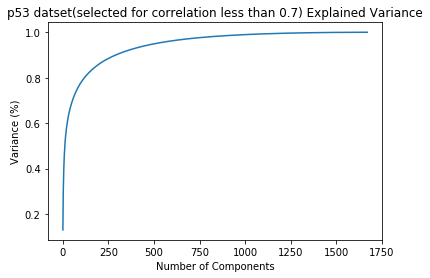

In [67]:
# Figure showing the number of components needed to explain the variance in the dataset.
plt.figure()
plt.plot(np.cumsum(pca_c7.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('p53 datset(selected for correlation less than 0.7) Explained Variance')
plt.show()

The above graph shows that at least 250 components are needed to explain 90% of the variation.

### PCA - using data selected by removing correlated features with a score more than 0.9

In [68]:
df_pca9 = pd.DataFrame(X9_scaled,columns=sel_numcols)

In [69]:
pca9 = PCA()
pca_c9 = pca9.fit(df_pca9)

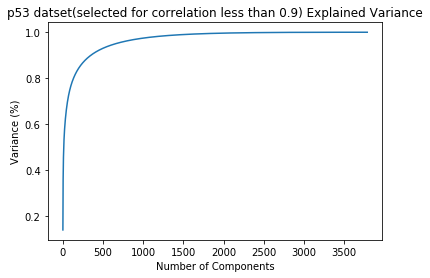

In [70]:
# Figure showing the number of components needed to explain the variance in the dataset.
plt.figure()
plt.plot(np.cumsum(pca_c9.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('p53 datset(selected for correlation less than 0.9) Explained Variance')
plt.show()

The above graph shows that at least 500 components are needed to explain 95% of the variation. 

Let us do the PCA on the entire data and see if this changes the %age of explained variation.

### PCA - using entire data 

In [42]:
# Using the entire scaled data for PCA
# created a dataframe of the scaled numerical values and the label 'y' - convert the values of 'y' to a string
df_pca = pd.DataFrame(X_scaled,columns=num_cols)
df_pca['y'] = y
df_pca['label'] = df_pca['y'].apply(lambda i: str(i))

In [43]:
from sklearn.decomposition import PCA
pca = PCA()
pca_c = pca.fit(df_pca[num_cols])

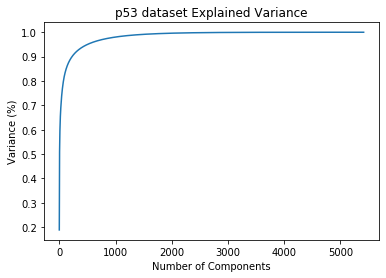

In [73]:
plt.figure()
plt.plot(np.cumsum(pca_c.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('p53 dataset Explained Variance')
plt.show()

Approx. 500 components explain 95% of the variation. This is not too different from the previous graphs.

The explained variation is not any different. Hence, we can choose to use PCA as it shows the number of components needed to explain 90% of the variation without having to drop any features or selecting a cut off score for correlation.

#### Visualising the PCA plot

In [74]:
# PCA using 2 components
pca_2 = PCA(n_components=2)
pc_2 = pca_2.fit_transform(X_scaled)

In [75]:
# convert the principal components of the data into a dataframe
principalDF = pd.DataFrame(data=pc_2, columns=['pca1', 'pca2'])

In [76]:
# concat the 'Type' label with this dataframe to make final_pcadf. This will have the principal components 
# 1 and 2 with the 'Type'
final_pcadf = pd.concat([principalDF, df[['Type']]],axis=1)

In [77]:
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

Explained variation per principal component: [0.1885016  0.10457065]


The first 2 components only explain about 30% of the variation in the data. But, we can still try to visualise the data using these 2 components.

Text(0.5, 1.0, 'PCA plot with Active and Inactive labels')

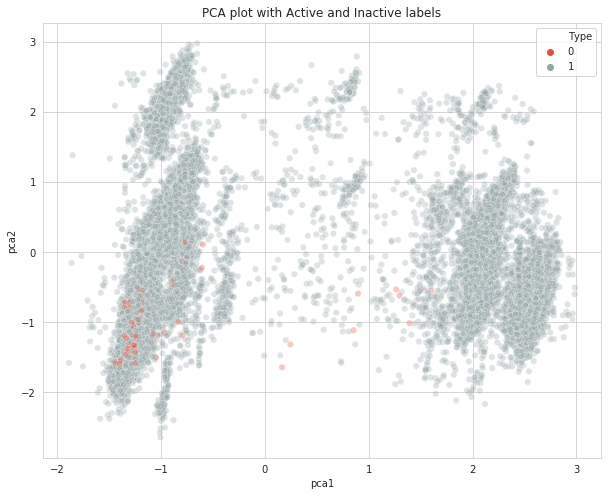

In [78]:
# plot pca1 and pca2 with 'Type' as hue.
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
flatui = ["#e74c3c","#95a5a6" ]
sns.scatterplot(
    x='pca1', y='pca2',
    hue='Type',
    palette=sns.color_palette(flatui, 2),
    data=final_pcadf,
    legend="full",
    alpha=0.3, s=40
)
plt.title("PCA plot with Active and Inactive labels")

The plot shows the 'active' red colored entries and the majority of the 'inactive' grey colored entries. Initially, we could not visualise anything in such high dimensional data - but with PCA even if these components only explain 30% of the variation, we can get a visualisation.

Instead of the 'Type' marked out in these plots, we can try to see the spread of the different kind of mutations by using the 'count' variable.

#### Visualising the PCA plot with 'count' as the category

In [79]:
# Generated another dataframe by dropping the 'count' column
df_c = df.drop(['Type', 'mutations','count'], axis=1)
num_cols_c = df_c.columns
print(df_c.shape)

(31159, 5413)


In [80]:
# Preprocessing the 'count' as categories 0,1,2,3,4,5
le = preprocessing.LabelEncoder()
le.fit(df['count'])
list(le.classes_)

[1, 2, 3, 4, 5, 6]

In [81]:
df['count'] = le.transform(df['count'])

In [82]:
list(le.inverse_transform([0,1,2,3,4,5]))

[1, 2, 3, 4, 5, 6]

In [83]:
c = df['count']

In [84]:
# Scaled this dataframe
X_c = minmax_scale(df_c)

In [85]:
# Fit pca, convert the pcs to dataframe and concat the 'count' feature to this
pc = pca_2.fit_transform(X_c)
pDF = pd.DataFrame(data=pc_2, columns=['pca1', 'pca2'])

In [86]:
final_pc = pd.concat([pDF, c, df[['Type']]],axis=1)

Text(0.5, 1.0, 'PCA plot with Counts as labels')

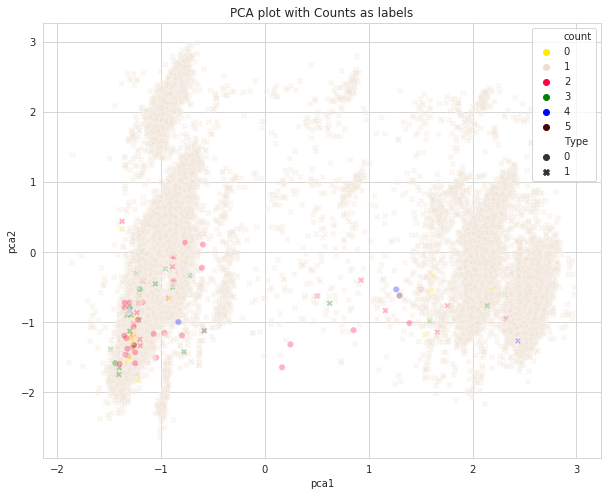

In [87]:
# plot the pca1 and pca2 with 'count' as the hue.
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
flatui = ["#fdee00", "#efdecd", "#ff033e", "#008000", "#0000ff", "#480607"]
sns.scatterplot(
    x='pca1', y='pca2',
    hue='count',
    style='Type',
    palette=sns.color_palette(flatui, 6),
    data=final_pc,
    legend="full",
    alpha=0.3, s=40)
plt.title("PCA plot with Counts as labels")

This PCA plot shows the 'count' and the 'Type' variables. With less than half of the variation being represented, its very hard to make a clear sense of the clusters in the graph.

# Baseline Model

   There are several classifiers for binary classification. Since, we have a highly imbalanced data set, we can try several classifiers for a baseline model and evaluate their performance before choosing them for fine tuning. Among the several classifiers, I will be trying Logistic regression, Naive bayes, Random Forests, Support Vector Machines, Gradient Boosting and XGBoost for a baseline model. 
   
   Based on their performance in the baseline and the computational capability available, models will be selected for parametric tuning and cross validation.

   Every classifier will need a training set to train the classifier and then test the performance of the classifier on a test set. The data is split into training and test sets using train_test_split and since the data set is highly imbalanced, we can stratify the 'y' labels in the split so that the split represents the 2 classes well. The PCA is fit on the training set alone to generate the PCs. But, both the training set and test set are PCA transformed to be used in different classifiers.
   
   Baseline models will use both the actual data and the PCs to show their performance with default settings.

## Training Data - Testing Data Split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=10)

In [42]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (21811, 5414)
Training Labels Shape: (21811,)
Testing Features Shape: (9348, 5414)
Testing Labels Shape: (9348,)


   To assess the performance of classifiers with the computational resources available, using PCA is good way to speed up the fitting of an algorithm. This helps especially for the parametric tuning and crossvalidation where you run randomized grid search to get the best possible parameters for a good model. Instead of using all the 5414 features, we could use around 800 PCs which explained about 97% of the variation in the data set. This may reduce the time for cross validation and parametric tuning of the models.

In [43]:
from sklearn.decomposition import PCA
pca_mod = PCA()

In [44]:
X_train_pc = pca_mod.fit_transform(X_train)

In [45]:
X_test_pc = pca_mod.transform(X_test)

In [46]:
exp_var_mod = pca_mod.explained_variance_ratio_
exp_var_mod

array([1.88600847e-01, 1.04367880e-01, 9.19828283e-02, ...,
       9.63382176e-11, 8.26666776e-11, 7.34371796e-11])

In [47]:
sum(exp_var_mod[0:800])

0.9727137640655925

In [48]:
pca = PCA(n_components=800)

In [49]:
X_train_pc = pca.fit_transform(X_train)

In [50]:
X_test_pc  = pca.transform(X_test)

Now, we have the training set, X_train and testing set, X_test from the actual data and the training set from the PCA fit data, X_train_pc and the test set which has only been transformed to the PC space, X_test_pc. Both the training sets are used to see if there is a difference in performance.

Performance is assessed by precision, recall and F1 score with 'macro' average. The data set is imbalanced with a majority of the labels 'inactive' and less than 1% as 'active' labels. Hence, the precision and recall are more valid measures of model performance. F1 score combines recall and precision using the harmonic mean. Among the different types of averaging the F1 score, we choose the 'macro' average. 'Macro' average calculates the metrics for each label and finds their unweighted mean without takin class imbalance into account. Since the 'active' labels are very important and need to be identified correctly, we use the 'macro' average.

Another metric to evaluate performance is the Matthews correlation coefficient (MCC). This is used in binary classifications and like the F1 score uses the true and false positives and negatives but is a more balanced measure which can also be used if class sizes are different. In essence, its a correlation coefficient between -1 and +1, the +1 representing a perfect prediction, 0 an average random prediction and -1 an inverse prediction.   

## Model 1 - Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

The training set from the actual data is first used for fitting the model and then the PCs are used for the same.

In [126]:
# Initialize the classifier and fit to the training set. class_weight is selected as 'balanced' for class imbalance.
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
# Use the fit to predict on the test set
y_pred = logreg.predict(X_test)

In [128]:
# print the confusion matrix showing the tp,tn,fp,fn
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  38    7]
 [  97 9206]]


In [129]:
# print the classification report
LG_bm = classification_report(y_test, y_pred,output_dict=True)
LG_bm_f1 = LG_bm['macro avg']['f1-score']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.84      0.42        45
           1       1.00      0.99      0.99      9303

    accuracy                           0.99      9348
   macro avg       0.64      0.92      0.71      9348
weighted avg       1.00      0.99      0.99      9348



In [130]:
# print the MCC score
LG_bm_mcc = MCC(y_test, y_pred)
print(MCC(y_test, y_pred))

0.48386656696099856


The report shows the 'macro avg' f1 score as 0.71 and MCC is 0.48. The predicted probabilities are used to calculate the true positives and false positives at different thresholds and generate the ROC curve.

In [59]:
# generate the roc_auc score and the tpr and fpr to plot the ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

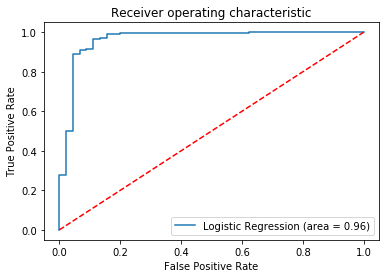

In [60]:
# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [61]:
# The entire process is repeated using the PCs of the training set and predicted the transformed test set.
logreg_pc = LogisticRegression(class_weight='balanced')
logreg_pc.fit(X_train_pc, y_train)

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
# predictions
y_pred_pc = logreg_pc.predict(X_test_pc)

In [66]:
cm_pc = confusion_matrix(y_test, y_pred_pc)
print(cm_pc)

[[  38    7]
 [ 124 9179]]


In [67]:
print(classification_report(y_test, y_pred_pc))

              precision    recall  f1-score   support

           0       0.23      0.84      0.37        45
           1       1.00      0.99      0.99      9303

    accuracy                           0.99      9348
   macro avg       0.62      0.92      0.68      9348
weighted avg       1.00      0.99      0.99      9348



In [70]:
print(MCC(y_test, y_pred_pc))

0.440817040737125


The report shows that the macro f1 score actually went down to 0.68 and MCC to 0.44. One thing to keep in mind is that the data is imbalanced with less than 1% with 'active' labels. The PCs we have used explain about 97% of the variation. So this could be a reason why the actual data set with all its features will perform better.

In [71]:
logit_roc_auc_pc = roc_auc_score(y_test, logreg_pc.predict_proba(X_test_pc)[:,1])
fpr_pc, tpr_pc, thresholds_pc = roc_curve(y_test, logreg_pc.predict_proba(X_test_pc)[:,1])

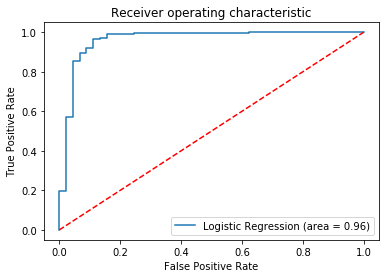

In [72]:
plt.figure()
plt.plot(fpr_pc, tpr_pc, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_pc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Model 2 - Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:
# initiate the classifier and fit the training data and then predict the test data
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predNB = gnb.predict(X_test)

# Calculated the number of mislabeled points
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_predNB).sum()))

Number of mislabeled points out of a total 9348 points : 3006


In [85]:
print(classification_report(y_test, y_predNB))
print(MCC(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.01      0.87      0.03        45
           1       1.00      0.68      0.81      9303

    accuracy                           0.68      9348
   macro avg       0.51      0.77      0.42      9348
weighted avg       0.99      0.68      0.80      9348

0.0804123487368497


The f1 score is less than 0.5 with poor precision. The Naive Bayes tends to prefer the majority class in predicitons.

In [86]:
# Repeating with the PCs
gnb_pc = GaussianNB()
gnb_pc.fit(X_train_pc, y_train)
y_predNB_pc = gnb_pc.predict(X_test_pc)
print("Number of mislabeled points out of a total %d points : %d" % (X_test_pc.shape[0], (y_test != y_predNB_pc).sum()))

Number of mislabeled points out of a total 9348 points : 223


In [87]:
print(classification_report(y_test, y_predNB_pc))
print(MCC(y_test, y_predNB_pc))

              precision    recall  f1-score   support

           0       0.15      0.82      0.25        45
           1       1.00      0.98      0.99      9303

    accuracy                           0.98      9348
   macro avg       0.57      0.90      0.62      9348
weighted avg       1.00      0.98      0.98      9348

0.34150698914521993


Though the f1 score has increased by 0.20 and precision has also improved, it has not performed as well as the Logistic Regression classifier.

## Model 3 - Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

#Initiate the classifier with the out-of-bag score set to True and class_weight set to 'balanced'
rfm = RandomForestClassifier(random_state=10, oob_score=True, class_weight='balanced')

In [96]:
# Fit and predict
rfm.fit(X_train, y_train)
y_predRFM = rfm.predict(X_test)

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [97]:
# calculate the f1 score and MCC and print it out
RF_bm = classification_report(y_test, y_predRFM, output_dict=True)
RF_bm_f1 = RF_bm['macro avg']['f1-score']
print(classification_report(y_test, y_predRFM))
RF_bm_mcc = MCC(y_test, y_predRFM)
print(MCC(y_test, y_predRFM))

              precision    recall  f1-score   support

           0       0.63      0.27      0.38        45
           1       1.00      1.00      1.00      9303

    accuracy                           1.00      9348
   macro avg       0.81      0.63      0.69      9348
weighted avg       0.99      1.00      0.99      9348

0.40866268546854295


The f1 score is at 0.69 and MCC is 0.41. Precision is the best so far - 0.63

In [227]:
# Repeating with the PCs
rfm_pc = RandomForestClassifier(random_state=10, oob_score=True, class_weight='balanced')

In [228]:
rfm_pc.fit(X_train_pc, y_train)
y_predRFM_pc = rfm_pc.predict(X_test_pc)

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [229]:
print(classification_report(y_test, y_predRFM))

              precision    recall  f1-score   support

           0       0.63      0.27      0.38        45
           1       1.00      1.00      1.00      9303

    accuracy                           1.00      9348
   macro avg       0.81      0.63      0.69      9348
weighted avg       0.99      1.00      0.99      9348



The f1 scores are the same as before. 

## Model 4 - Support Vector Machine

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Initiate the classifier with the 'linear' kernel
svm = SVC(kernel='linear', random_state=10, class_weight='balanced')

In [125]:
# Fit and predict
svm.fit(X_train, y_train)
ypredSVM = svm.predict(X_test)

In [127]:
# Calculate and print the f1 and MCC score
SV_bm_lin = classification_report(y_test, ypredSVM, output_dict=True)
SV_bm_lin_f1 = SV_bm_lin['macro avg']['f1-score']
print(classification_report(y_test, ypredSVM))
SV_bm_lin_mcc = MCC(y_test, ypredSVM)
print(MCC(y_test, ypredSVM))

              precision    recall  f1-score   support

           0       0.44      0.71      0.55        45
           1       1.00      1.00      1.00      9303

    accuracy                           0.99      9348
   macro avg       0.72      0.85      0.77      9348
weighted avg       1.00      0.99      0.99      9348

0.559596138181342


The f1 score is the better than the Random Forest model - 0.77 with an MCC of 0.56, though precision is lower than that of Random Forest.

In [128]:
# repeat with the PCs
svm_pc = SVC(kernel='linear', random_state=10, class_weight='balanced')

In [129]:
svm_pc.fit(X_train_pc, y_train)
ypredSVM_pc = svm_pc.predict(X_test_pc)

In [130]:
print(classification_report(y_test, ypredSVM_pc))

              precision    recall  f1-score   support

           0       0.37      0.73      0.49        45
           1       1.00      0.99      1.00      9303

    accuracy                           0.99      9348
   macro avg       0.68      0.86      0.74      9348
weighted avg       1.00      0.99      0.99      9348



The f1 score with the PCs goes down by 0.03. The PCs did not perform as well as the actual data. Considering the parameters to be selected during cross validation, the choice between performance and computational possibility will have to be made.

In [131]:
from sklearn.svm import SVC

# Initiate the SVM with the 'rbf' kernel
svm_rbf = SVC(kernel='rbf', random_state=10, class_weight='balanced')

In [132]:
# Fit and predict
svm_rbf.fit(X_train, y_train)
y_predSVM_rbf = svm_rbf.predict(X_test)

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [135]:
# Calcualte and print the f1 and MCC score
SV_bm_rbf = classification_report(y_test, y_predSVM_rbf, output_dict=True)
SV_bm_rbf_f1 = SV_bm_rbf['macro avg']['f1-score']
print(classification_report(y_test, y_predSVM_rbf))
SV_bm_rbf_mcc = MCC(y_test, y_predSVM_rbf)
print(MCC(y_test, y_predSVM_rbf))

              precision    recall  f1-score   support

           0       0.07      0.89      0.14        45
           1       1.00      0.95      0.97      9303

    accuracy                           0.95      9348
   macro avg       0.54      0.92      0.55      9348
weighted avg       0.99      0.95      0.97      9348

0.24776671808675785


The 'rbf' kernel did not do as well as the 'linear' kernel.

In [136]:
# repeat with PCs
svm_rbf_pc = SVC(kernel='rbf', random_state=10, class_weight='balanced')

In [137]:
svm_rbf_pc.fit(X_train_pc, y_train)
y_predSVM_rbf_pc = svm_rbf_pc.predict(X_test_pc)

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [138]:
print(classification_report(y_test, y_predSVM_rbf_pc))

              precision    recall  f1-score   support

           0       0.09      0.89      0.16        45
           1       1.00      0.96      0.98      9303

    accuracy                           0.96      9348
   macro avg       0.54      0.92      0.57      9348
weighted avg       1.00      0.96      0.97      9348



Though the PCs did increase the f1 score to 0.57, it did not perform as well as the linear model.We can explore this in the parameter tuning section of the project.

## Model 5 - Gradient Boosting

In [159]:
from sklearn import ensemble
#from sklearn.ensemble import GradientBoostingClassfier
model = sklearn.ensemble.GradientBoostingClassifier()

In [160]:
# fit and predict
model.fit(X_train,y_train)
y_predGB = model.predict(X_test)

In [162]:
# Calculate and print f1 and MCC scores
GB_bm = classification_report(y_test, y_predGB, output_dict=True)
GB_bm_f1 = GB_bm['macro avg']['f1-score']
print(classification_report(y_test, y_predGB))
GB_bm_mcc = MCC(y_test, y_predGB)
print(MCC(y_test, y_predGB))

              precision    recall  f1-score   support

           0       0.54      0.42      0.48        45
           1       1.00      1.00      1.00      9303

    accuracy                           1.00      9348
   macro avg       0.77      0.71      0.74      9348
weighted avg       1.00      1.00      1.00      9348

0.47654878623912583


In [163]:
# Repeat using the PCs
model_pc = model = sklearn.ensemble.GradientBoostingClassifier()

In [164]:
# Fit and predict
model_pc.fit(X_train_pc,y_train)
y_predGB_pc = model_pc.predict(X_test_pc)

In [165]:
print(classification_report(y_test, y_predGB_pc))

              precision    recall  f1-score   support

           0       0.26      0.33      0.29        45
           1       1.00      1.00      1.00      9303

    accuracy                           0.99      9348
   macro avg       0.63      0.66      0.65      9348
weighted avg       0.99      0.99      0.99      9348



As usual, using the entire data set gave much better scores than the PCs. The Gradient boosting did better than the Random Forest, but none of the models have matched the precision of the Random Forest.

## Model 6 - XGBoost

In [53]:
from xgboost import XGBClassifier

In [167]:
# Initiate the classifier, fit and predict
mod = XGBClassifier()
mod.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [168]:
y_predXGB = mod.predict(X_test)

In [170]:
# predictions are rounded as they are calculated as probabilities
# calculate and print the f1 and MCC scores
predictions = [round(value) for value in y_predXGB]

XGB_bm = classification_report(y_test, predictions, output_dict=True)
XGB_bm_f1 = XGB_bm['macro avg']['f1-score']
XGB_bm_mcc = MCC(y_test, predictions)
print(MCC(y_test, predictions))
print(classification_report(y_test, predictions))

0.5832615452180652
              precision    recall  f1-score   support

           0       0.77      0.44      0.56        45
           1       1.00      1.00      1.00      9303

    accuracy                           1.00      9348
   macro avg       0.88      0.72      0.78      9348
weighted avg       1.00      1.00      1.00      9348



In [171]:
# using the PCs to fit and predict
mod_pc = XGBClassifier()
mod_pc.fit(X_train_pc,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [172]:
y_predXGB_pc = mod_pc.predict(X_test_pc)

In [173]:
predictions_pc = [round(value) for value in y_predXGB_pc]
print(classification_report(y_test, predictions_pc))

              precision    recall  f1-score   support

           0       0.81      0.29      0.43        45
           1       1.00      1.00      1.00      9303

    accuracy                           1.00      9348
   macro avg       0.90      0.64      0.71      9348
weighted avg       1.00      1.00      1.00      9348



The XGBooster has performed the best among all the baseline models with an f1 of 0.78, precision of 0.77 and an MCC of

# Hyperparameter Tuning and Cross Validation

Hyperparameters are parameters that are external to our model and highly responsible for getting good performance with models.These cannot be learned from the training process and express hig level properties of the model. It determines the complexity of the model or the speed of learning. The process of finding the right combination of hyperparameters is very complex. Currently, it involves the RandomSearch or GridSearch across Cartesian products of sets of hyperparameters.

Cross validation is a technique to identify how well our model performed and a need to test that our model is well trained without any overfitting or underfitting. I have used the StratifiedKFold cross validation because of class imbalance. 

For each model, we created a dictionary of the different parameters with different values and implemented the RandomizedSearchCV which randomly selects the parameter combinations and also does a stratified KFold and the best model is selected by their scoring - f1_macro was used.

## Model 1 - Logistic Regression

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [116]:
# Create a dictionary with the hyperparameter options.
param_LG = {'penalty': ['l1','l2'],
            'C': [0.001,0.01,0.1,1,10],
            'solver': ['liblinear'],
            'class_weight': ['balanced']}

log_HT = LogisticRegression(max_iter=300)

In [117]:
# create randomizedsearch object using the parameter grid and the classifier with 5-fold stratified cross validation
clf_LG = RandomizedSearchCV(log_HT, param_LG,cv=5, scoring='f1_macro')

In [118]:
# Fit the object 
best_modelLG = clf_LG.fit(X_train,y_train)

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [119]:
# print the best parameters for the best model
print('Best Penalty: ', best_modelLG.best_estimator_.get_params()['penalty'])
print('Best C: ', best_modelLG.best_estimator_.get_params()['C'])

Best Penalty:  l2
Best C:  10


In [120]:
# Use the best model to predict on the test set
y_predLGHT = best_modelLG.predict(X_test)

In [121]:
# print confusion matrix to see the tp,tn,fp and fn
confusion_matrix_HT = confusion_matrix(y_test, y_predLGHT)
print(confusion_matrix_HT)

[[  33   12]
 [  52 9251]]


In [122]:
# print classification report
LG_ht = classification_report(y_test, y_predLGHT, output_dict=True)
LG_ht_f1 = LG_ht['macro avg']['f1-score']
print(classification_report(y_test, y_predLGHT))
LG_ht_mcc = MCC(y_test, y_predLGHT)
print(MCC(y_test, y_predLGHT))

              precision    recall  f1-score   support

           0       0.39      0.73      0.51        45
           1       1.00      0.99      1.00      9303

    accuracy                           0.99      9348
   macro avg       0.69      0.86      0.75      9348
weighted avg       1.00      0.99      0.99      9348

0.530653398543135


In [123]:
# get the roc_auc score and the true positive rate and false positive rate to generate the ROC curve
roc_auc_HT = roc_auc_score(y_test, best_modelLG.predict_proba(X_test)[:,1])
fprHT, tprHT, thresholdsHT = roc_curve(y_test, best_modelLG.predict_proba(X_test)[:,1])

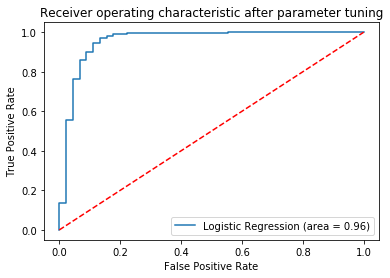

In [124]:
# plot the ROC curve with the best model
plt.figure()
plt.plot(fprHT, tprHT, label='Logistic Regression (area = %0.2f)' % roc_auc_HT)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic after parameter tuning')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The Logistic regression model after selecting for the hyperparameters did slightly better than the baseline model.

In [135]:
print('Baseline F1 Score: ' + str(round(LG_bm_f1,2)) + ', Baseline MCC Score: '+ str(round(LG_bm_mcc,2)))
print('F1 Score after tuning: '+ str(round(LG_ht_f1,2)) + ', MCC Score after tuning: '+ str(round(LG_ht_mcc,2)))

Baseline F1 Score: 0.71, Baseline MCC Score: 0.48
F1 Score after tuning: 0.75, MCC Score after tuning: 0.53


## Model 3 - Random Forest

The Random Forest model can perform better if we use the optimum number of trees and features. To save time and effort computationally, I will use the oob_score (out-of-bag) to find a small range for the n_estimators (number of trees) that I can use for Random grid search.

In [99]:
# Initiate classifier with oob_score as True
rfm_HT = RandomForestClassifier(random_state=10,oob_score=True,class_weight='balanced')

In [100]:
# Create a list of possible no. of trees - n_estimators
e1 = [10,20,30,40,50]

# create a dictionary to hold the no. of trees and its corresponding oob_error
error_rate1 = {}
for i in e1:
    rfm_HT.set_params(n_estimators=i)
    rfm_HT.fit(X_train, y_train)
    oob_error = 1-rfm_HT.oob_score_
    error_rate1[i]=oob_error

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide b

Text(0.5, 1.0, 'OOB plot ')

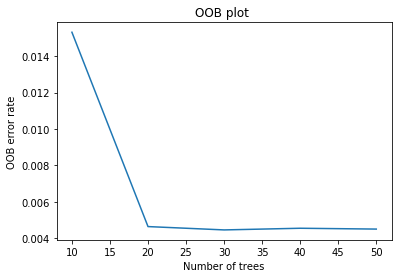

In [101]:
# plot the n_estimators along the X axis and the error rate along the Y axis

xs1 = []
ys1 = []
for key, value in error_rate1.items():
    xs1.append(key)
    ys1.append(value)
    
plt.plot(xs1,ys1)
plt.xlabel('Number of trees')
plt.ylabel('OOB error rate')
plt.title('OOB plot ')

We can see that the oob error comes down to 20 and then gradually lowers to 50. We can explore to see what happens to the plot further than 50 trees.

In [102]:
# To repeat the above code for more number of trees, instantiate the classifier with warm_start = True
rfm_HT = RandomForestClassifier(random_state=10,warm_start=True,oob_score=True,class_weight='balanced')

In [103]:
e2 = [50,60,70,80,90]
error_rate2 = {}
for i in e2:
    rfm_HT.set_params(n_estimators=i)
    rfm_HT.fit(X_train, y_train)
    oob_error = 1-rfm_HT.oob_score_
    error_rate2[i]=oob_error

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:504: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:504: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properl

Text(0.5, 1.0, 'OOB plot ')

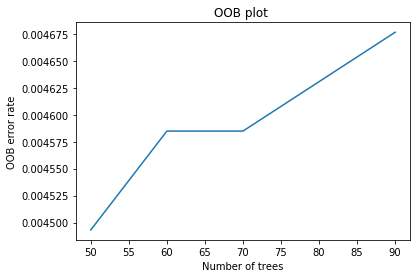

In [104]:
xs2 = []
ys2 = []
for key, value in error_rate2.items():
    xs2.append(key)
    ys2.append(value)
    
plt.plot(xs2,ys2)
plt.xlabel('Number of trees')
plt.ylabel('OOB error rate')
plt.title('OOB plot ')

In [105]:
e3 = [100,200,300]
error_rate3 = {}
for i in e3:
    rfm_HT.set_params(n_estimators=i)
    rfm_HT.fit(X_train, y_train)
    oob_error = 1-rfm_HT.oob_score_
    error_rate3[i]=oob_error

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:504: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:504: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properl

Text(0.5, 1.0, 'OOB plot ')

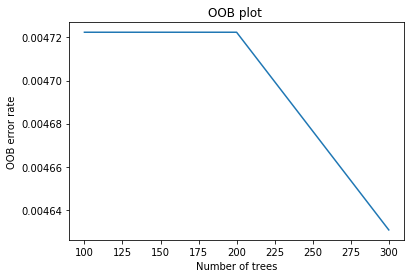

In [106]:
xs3 = []
ys3 = []
for key, value in error_rate3.items():
    xs3.append(key)
    ys3.append(value)
    
plt.plot(xs3,ys3)
plt.xlabel('Number of trees')
plt.ylabel('OOB error rate')
plt.title('OOB plot ')

Seeing the above plots, its safe to say that the error rate plateaus from 50 to 70 trees and then starts to be slightly erratic in the same level. Now, keeping the n_estimators at 50, we can try different number of features as max_features.

In [107]:
rfm_HTf = RandomForestClassifier(random_state=10,oob_score=True,n_estimators=50,class_weight='balanced')

In [108]:
# Create a list of the different number of features to be tried
e_f = [10,20,30,40,50,60,70,80,90,100,200]
error_rate_f = {}
for i in e_f:
    rfm_HTf.set_params(max_features=i)
    rfm_HTf.fit(X_train, y_train)
    oob_error = 1-rfm_HTf.oob_score_
    error_rate_f[i]=oob_error

Text(0.5, 1.0, 'OOB plot ')

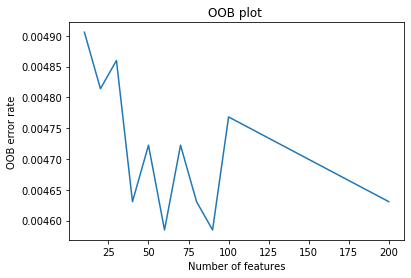

In [109]:
xs_f = []
ys_f = []
for key, value in error_rate_f.items():
    xs_f.append(key)
    ys_f.append(value)
    
plt.plot(xs_f,ys_f)
plt.xlabel('Number of features')
plt.ylabel('OOB error rate')
plt.title('OOB plot ')

The above plot shows that the error hits a low when there are 100 features used as the max_features parameter.

Now, we can set up a parameter grid with just a few options for the n_estimators and max_features and conduct randomized search to see which parameter combinations do well.

In [110]:
# Initiate the classifier with class_weight set to 'balanced' because of the class imbalance
rfm_HT = RandomForestClassifier(random_state=10,oob_score=True, class_weight='balanced')

In [111]:
# set up a parameter grid with the different options
param_RF = {'n_estimators': [30,40,50],
            'max_features': [50,100,200]}

In [112]:
# Conduct a  random grid search using the parameter grid and the classifier with a 5-fold stratified cross validation 
clf_RF = RandomizedSearchCV(rfm_HT, param_RF,cv=5,scoring = 'f1_macro')

In [113]:
best_modelRF = clf_RF.fit(X_train,y_train)

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average,

In [114]:
# print the best parameters for the best model
print('Best n_estimators: ', best_modelRF.best_estimator_.get_params()['n_estimators'])
print('Best max_features: ', best_modelRF.best_estimator_.get_params()['max_features'])

Best n_estimators:  30
Best max_features:  100


In [115]:
y_predRFHT = best_modelRF.predict(X_test)

In [116]:
RF_ht = classification_report(y_test, y_predRFHT, output_dict=True)
RF_ht_f1 = RF_ht['macro avg']['f1-score']
print(classification_report(y_test, y_predRFHT))
RF_ht_mcc = MCC(y_test, y_predRFHT)
print(MCC(y_test, y_predRFHT))

              precision    recall  f1-score   support

           0       0.54      0.16      0.24        45
           1       1.00      1.00      1.00      9303

    accuracy                           1.00      9348
   macro avg       0.77      0.58      0.62      9348
weighted avg       0.99      1.00      0.99      9348

0.2877200139029257


The Random Forest baseline model did better - f1 of 0.69 and precision of 0.63.

In [117]:
param_RF_pc = {'n_estimators': [50,100,150],
               'max_features': ['auto', None]}

In [118]:
rfm_HT_pc = RandomForestClassifier(random_state=10,oob_score=True, class_weight='balanced')

In [119]:
clf_RF_pc = RandomizedSearchCV(rfm_HT_pc, param_RF_pc,cv=5)

In [120]:
best_modelRF_pc = clf_RF_pc.fit(X_train_pc,y_train)

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [121]:
# print the best parameters for the best model
print('Best n_estimators: ', best_modelRF_pc.best_estimator_.get_params()['n_estimators'])
print('Best max_features: ', best_modelRF_pc.best_estimator_.get_params()['max_features'])

Best n_estimators:  50
Best max_features:  auto


In [122]:
y_predRFHT_pc = best_modelRF_pc.predict(X_test_pc)

In [123]:
print(classification_report(y_test, y_predRFHT_pc))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        45
           1       1.00      1.00      1.00      9303

    accuracy                           1.00      9348
   macro avg       1.00      0.51      0.52      9348
weighted avg       1.00      1.00      0.99      9348



The f1 score was less when the PCs training/test set were used.

## Model 4 - SVM

In [139]:
# Initiate the SVC with the kernel, random_state and class_weight
svm_htl = SVC(kernel='linear',random_state=10, class_weight='balanced')

In [140]:
# different values for C
param_SVM_htl = {'C':[0.1,1,10,100,1000]}

In [141]:
# Use RandomizedSearchCV to find the best model 
clf_SVM_htl = RandomizedSearchCV(svm_htl, param_SVM_htl,cv=5,scoring='f1_macro')

In [142]:
# fit the model
best_modelSVM_htl = clf_SVM_htl.fit(X_train,y_train)

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [143]:
# print the best parameters for the best model
print('Best C: ', best_modelSVM_htl.best_estimator_.get_params()['C'])

Best C:  1


In [144]:
# Predict using hte best model
y_predSVM_htl = best_modelSVM_htl.predict(X_test)

In [145]:
# Print the MCC and classification report
SV_ht_lin = classification_report(y_test, y_predSVM_htl, output_dict=True)
SV_ht_lin_f1 = SV_ht_lin['macro avg']['f1-score']
print(classification_report(y_test, y_predSVM_htl))
SV_ht_lin_mcc = MCC(y_test, y_predSVM_htl)
print(MCC(y_test, y_predSVM_htl))

              precision    recall  f1-score   support

           0       0.44      0.71      0.55        45
           1       1.00      1.00      1.00      9303

    accuracy                           0.99      9348
   macro avg       0.72      0.85      0.77      9348
weighted avg       1.00      0.99      0.99      9348

0.559596138181342


The performance of the linear kernel of the SVM did not improve over the baseline - it was pretty much the same.

The 'rbf' and 'poly' kernels were also used on the models and evaluated their performance. Since, the RandomSearchCV was running too slow and crashed when given too many combinations, i tried a few separately to see if the model did better than the linear kernel.

In [146]:
# Initiate the SVm with the 'rbf' kernel
svm_htr = SVC(kernel='rbf',random_state=10, class_weight='balanced')

In [147]:
# options on parameters
param_SVM_htr = {'gamma': ['auto'],
                 'C': [10]}

In [148]:
clf_SVM_htr = RandomizedSearchCV(svm_htr, param_SVM_htr,cv=5,scoring='f1_macro')

In [149]:
best_modelSVM_htr = clf_SVM_htr.fit(X_train,y_train)

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [150]:
y_predSVM_htr = best_modelSVM_htr.predict(X_test)

In [151]:
SV_ht_rbf = classification_report(y_test, y_predSVM_htr, output_dict=True)
SV_ht_rbf_f1 = SV_ht_rbf['macro avg']['f1-score']
print(classification_report(y_test, y_predSVM_htr))
SV_ht_rbf_mcc = MCC(y_test, y_predSVM_htr)
print(MCC(y_test, y_predSVM_htr))

              precision    recall  f1-score   support

           0       0.09      0.89      0.17        45
           1       1.00      0.96      0.98      9303

    accuracy                           0.96      9348
   macro avg       0.55      0.92      0.57      9348
weighted avg       1.00      0.96      0.97      9348

0.27881376566556043


In [152]:
# Trying second set of options on the same 'rbf' kernel
param_SVM_htr1 = {'gamma': ['auto'],
                 'C': [1]}

In [153]:
clf_SVM_htr1 = RandomizedSearchCV(svm_htr, param_SVM_htr1,cv=5)

In [154]:
best_modelSVM_htr1 = clf_SVM_htr1.fit(X_train,y_train)

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [155]:
y_predSVM_htr1 = best_modelSVM_htr.predict(X_test)

In [158]:
SV_ht_rbf1 = classification_report(y_test, y_predSVM_htr1, output_dict=True)
SV_ht_rbf1_f1 = SV_ht_rbf['macro avg']['f1-score']
print(classification_report(y_test, y_predSVM_htr1))
SV_ht_rbf1_mcc = MCC(y_test, y_predSVM_htr1)
print(MCC(y_test, y_predSVM_htr1))

              precision    recall  f1-score   support

           0       0.09      0.89      0.17        45
           1       1.00      0.96      0.98      9303

    accuracy                           0.96      9348
   macro avg       0.55      0.92      0.57      9348
weighted avg       1.00      0.96      0.97      9348

0.27881376566556043


The 'rbf' kernel did not do as well as the 'linear' kernel.

In [70]:
# Trying the 'poly' kernel
svm_htp = SVC(kernel='poly',random_state=10, class_weight='balanced')

In [71]:
param_SVM_htp = {'degree': [3]}

In [72]:
clf_SVM_htp = RandomizedSearchCV(svm_htp, param_SVM_htp,cv=5)

In [73]:
best_modelSVM_htp = clf_SVM_htp.fit(X_train,y_train)

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarnin

In [74]:
y_predSVM_htp = best_modelSVM_htp.predict(X_test)

In [75]:
print(classification_report(y_test, y_predSVM_htp))

              precision    recall  f1-score   support

           0       0.01      0.91      0.03        45
           1       1.00      0.68      0.81      9303

    accuracy                           0.68      9348
   macro avg       0.51      0.80      0.42      9348
weighted avg       0.99      0.68      0.81      9348



The linear kernel of the SVM was the only one to perform well, though it did do better than its baseline.

## Model 6 - XGBoost

For the XGBoost, we have a lot of hyperparameters to tune and I chose to work with the learning_rate, subsample, gamma and the scale_pos_weight parameters. I tried various combinations separately as this seemed to work faster than trying to run one RandomizedSearchCV code on it.

The scale_pos_weight is a parameter designed to tune the behaviour of the algorithm for imbalanced classification problems. A sensible default value is the inverse of the class distribution. So, I tried just 2 values - 1 (default) and 99 (as we have 0.5:99.5 proportion).

In [174]:
# Option 1 

# Inititate, fit and predict
mod_ht1 = XGBClassifier(learning_rate=0.01, subsample=0.8,gamma=1)
mod_ht1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [175]:
y_predXGBht1 = mod_ht1.predict(X_test)

In [178]:
# Print the scores
predictions_XGBht1 = [round(value) for value in y_predXGBht1]
XGB_ht = classification_report(y_test, predictions_XGBht1, output_dict = True)
XGB_ht_f1 = XGB_ht['macro avg']['f1-score']
XGB_ht_mcc = MCC(y_test, predictions_XGBht1)
print(MCC(y_test, predictions_XGBht1))
print(classification_report(y_test, predictions_XGBht1))

0.5874200849131033
              precision    recall  f1-score   support

           0       0.71      0.49      0.58        45
           1       1.00      1.00      1.00      9303

    accuracy                           1.00      9348
   macro avg       0.85      0.74      0.79      9348
weighted avg       1.00      1.00      1.00      9348



In [57]:
# Option 2
mod_ht2 = XGBClassifier()

In [180]:
param_XGB_ht2 = {'learning_rate': [0.01],
                 'subsample': [0.8],
                 'scale_pos_weight': [99]}

In [181]:
clf_XGB_ht2 = RandomizedSearchCV(mod_ht2, param_XGB_ht2,cv=5,scoring='f1_macro')

In [182]:
best_modelXGB_ht2 = clf_XGB_ht2.fit(X_train,y_train)

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [184]:
y_predXGBht2 = best_modelXGB_ht2.predict(X_test)

In [185]:
predictions_XGBht2 = [round(value) for value in y_predXGBht2]
XGB_ht2 = classification_report(y_test, predictions_XGBht2, output_dict = True)
XGB_ht2_f1 = XGB_ht2['macro avg']['f1-score']
XGB_ht2_mcc = MCC(y_test, predictions_XGBht2)
print(MCC(y_test, predictions_XGBht2))
print(classification_report(y_test, predictions_XGBht2))

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       1.00      1.00      1.00      9303

    accuracy                           1.00      9348
   macro avg       0.50      0.50      0.50      9348
weighted avg       0.99      1.00      0.99      9348



/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [64]:
# Option 3
param_XGB_ht3 = {'learning_rate': [0.1],
                 'subsample': [0.8],
                 'scale_pos_weight': [99]}

In [65]:
clf_XGB_ht3 = RandomizedSearchCV(mod_ht2, param_XGB_ht3,cv=5,scoring='f1_macro')

In [66]:
best_model_XGB_ht3 = clf_XGB_ht3.fit(X_train,y_train)

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [67]:
y_predXGBht3 = best_model_XGB_ht3.predict(X_test)

In [68]:
predictions_XGBht3 = [round(value) for value in y_predXGBht3]
XGB_ht3 = classification_report(y_test, predictions_XGBht3,output_dict=True)
XGB_ht3_f1 = XGB_ht3['macro avg']['f1-score']
XGB_ht3_mcc = MCC(y_test, predictions_XGBht3)
print(MCC(y_test, predictions_XGBht3))
print(classification_report(y_test, predictions_XGBht3))

0.4705202496676698
              precision    recall  f1-score   support

           0       1.00      0.22      0.36        45
           1       1.00      1.00      1.00      9303

    accuracy                           1.00      9348
   macro avg       1.00      0.61      0.68      9348
weighted avg       1.00      1.00      1.00      9348



In [194]:
# Option 4
param_XGB_ht4 = {'learning_rate': [0.1],
                 'subsample': [0.8],
                 'gamma': [5],
                 'scale_pos_weight': [99]}

In [195]:
clf_XGB_ht4 = RandomizedSearchCV(mod_ht2, param_XGB_ht4,cv=5,scoring='f1_macro')

In [196]:
best_model_XGB_ht4 = clf_XGB_ht4.fit(X_train,y_train)

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [197]:
y_predXGBht4 = best_model_XGB_ht4.predict(X_test)

In [198]:
predictions_XGBht4 = [round(value) for value in y_predXGBht4]
XGB_ht4 = classification_report(y_test, predictions_XGBht4, output_dict=True)
XGB_ht4_f1 = XGB_ht4['macro avg']['f1-score']
XGB_ht4_mcc = MCC(y_test, predictions_XGBht4)
print(MCC(y_test, predictions_XGBht4))
print(classification_report(y_test, predictions_XGBht4))

0.4463508031937716
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        45
           1       1.00      1.00      1.00      9303

    accuracy                           1.00      9348
   macro avg       1.00      0.60      0.67      9348
weighted avg       1.00      1.00      0.99      9348



In [55]:
# Option 5
param_XGB_ht5 = {'learning_rate': [0.05],
                 'subsample': [0.8],
                 'scale_pos_weight': [99]}

In [58]:
clf_XGB_ht5 = RandomizedSearchCV(mod_ht2, param_XGB_ht5,cv=5,scoring='f1_macro')

In [59]:
best_model_XGB_ht5 = clf_XGB_ht5.fit(X_train,y_train)

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
y_predXGBht5 = best_model_XGB_ht5.predict(X_test)

In [63]:
predictions_XGBht5 = [round(value) for value in y_predXGBht5]
XGB_ht5 = classification_report(y_test, predictions_XGBht5, output_dict=True)
XGB_ht5_f1 = XGB_ht5['macro avg']['f1-score']
XGB_ht5_mcc = MCC(y_test, predictions_XGBht5)
print(MCC(y_test, predictions_XGBht5))
print(classification_report(y_test, predictions_XGBht5))

0.3936022637553419
              precision    recall  f1-score   support

           0       1.00      0.16      0.27        45
           1       1.00      1.00      1.00      9303

    accuracy                           1.00      9348
   macro avg       1.00      0.58      0.63      9348
weighted avg       1.00      1.00      0.99      9348



Though all of the options had scores lower than the baseline model, the baseline model did not have the weights for an imbalanced data set. Option 3 did better than the others with an f1 score of 0.67 and precision of 1.

### Combining Models

In [75]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

In [85]:
kfold = model_selection.StratifiedKFold(n_splits=5, random_state=10)

In [103]:
estimators = []
model1 = LogisticRegression(penalty='l2', C=10, class_weight='balanced')
estimators.append(('logistic', model1))

model2 = SVC(kernel='linear',random_state=10, C=1,class_weight='balanced')
estimators.append(('svm', model2))

model3 = XGBClassifier(learning_rate=0.1, subsample=0.8, scale_pos_weight=99, random_state=10)
estimators.append(('xgb', model3))

In [78]:
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_scaled, y, cv=kfold, scoring='f1_macro')

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

In [79]:
print(results.mean())

0.6327151449150735


In [80]:
results

array([0.49003265, 0.52061283, 0.51611776, 0.8192749 , 0.81753759])

In [104]:
ensemble = VotingClassifier(estimators)
results_test = model_selection.cross_val_score(ensemble, X_test, y_test, cv=kfold, scoring='f1_macro')

/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arunsn/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

In [105]:
print(results_test.mean())
results_test

0.7815185045536658


array([0.79317754, 0.71321218, 0.85226967, 0.81484836, 0.73408477])

In [110]:
estimators1 = []
model1 = LogisticRegression(penalty='l2', C=10, solver='liblinear', class_weight='balanced')
estimators1.append(('logistic', model1))

model2 = SVC(kernel='linear',random_state=10, C=1,class_weight='balanced')
estimators1.append(('svm', model2))

model3 = XGBClassifier(learning_rate=0.1, subsample=0.8, scale_pos_weight=99, random_state=10)
estimators1.append(('xgb', model3))

In [111]:
ensemble1 = VotingClassifier(estimators1)
results1 = model_selection.cross_val_score(ensemble1, X_scaled, y, cv=kfold, scoring='f1_macro')

In [112]:
print(results1.mean())
print(results1)

0.6327151449150735
[0.49003265 0.52061283 0.51611776 0.8192749  0.81753759]


In [113]:
results1_test = model_selection.cross_val_score(ensemble1, X_test, y_test, cv=kfold, scoring='f1_macro')

In [114]:
print(results1_test.mean())
print(results1_test)

0.7815185045536658
[0.79317754 0.71321218 0.85226967 0.81484836 0.73408477]


In [94]:
ensemble1 = VotingClassifier(estimators1)
e1 = ensemble1.fit(X_train,y_train)

In [108]:
y_pred_e1 = e1.predict(X_test)

In [109]:
e1_report = classification_report(y_test, y_pred_e1, output_dict=True)
e1_f1 = e1_report['macro avg']['f1-score']
e1_mcc = MCC(y_test, y_pred_e1)
print(classification_report(y_test, y_pred_e1))
print(e1_mcc)

              precision    recall  f1-score   support

           0       0.45      0.71      0.55        45
           1       1.00      1.00      1.00      9303

    accuracy                           0.99      9348
   macro avg       0.72      0.85      0.77      9348
weighted avg       1.00      0.99      1.00      9348

0.5635785001719397
